# SDF Sampler (2D)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sdf_sampler.sampler import SDF_2DSampler
from sdf_sampler.utils import sample_2D_grid, plot_sdf, plot_scatter, plot_scatter_redblue

## Create a sampler and use it to generate a random sdf

In [2]:
sampler = SDF_2DSampler(N=7)

primitives not found, so looking for default ones
operations not found, so looking for default ones
transform not found, so looking for default ones


In [3]:
[p['name'] for p in sampler.primitives.values()]

['line', 'triangle', 'rectangle', 'hexagon', 'polygon', 'circle']

In [4]:
[o['name'] for o in sampler.operations.values()]

['union',
 'intersection',
 'blend',
 'negate_union',
 'negate_intersection',
 'difference']

In [5]:
sample = sampler()

## Visualize it

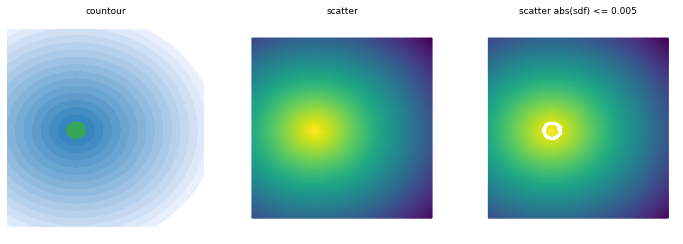

In [6]:
def plotit(s):
    fig, axes = plt.subplots(1,3,figsize=(12,4))
    axes = axes.flatten().tolist()
    plot_sdf(s, ax=axes[0], title='countour')
    plot_scatter(s, ax=axes[1], title='scatter')
    eps = 0.005
    plot_scatter(s, ax=axes[2], eps=eps, title=f'scatter abs(sdf) <= {eps:.3f}')
    plt.show()
# plot
plotit(sample.sdf())

## Show how the SDF was created

In [7]:
print(sample.root)


                                                  ______________~∩(-(~∩(p,~∪(c,c)),r),c)_11_
                                                 /                                          \
             _________________________-(~∩(p,~∪(c,c)),r)_10_                                c_2
            /                                               \
   _~∩(p,~∪(c,c))_9________                                 r_1
  /                        \
p_4                    _~∪(c,c)_8_
                      /           \
                    c_7           c_7



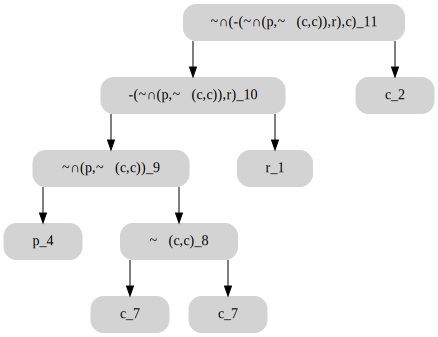

In [8]:
sample.root

Every sample needs to keep track of the sdf used to generate values because they will be used on demand

In [9]:
len(sample.sdfs_list)

12

This allows us to see the pieces that helped to created the final sdf

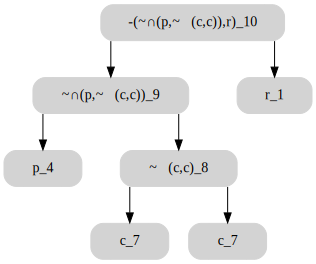

In [10]:
sample.root.left

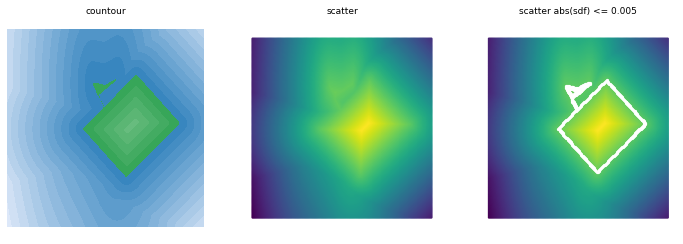

In [11]:
plotit(sample.sdf(sample.left))

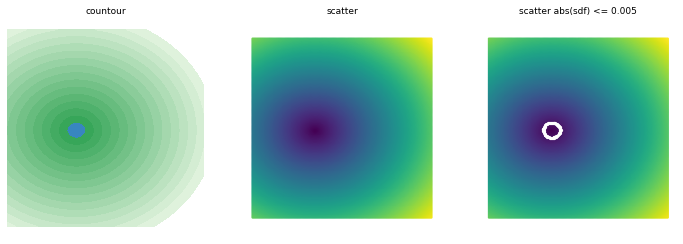

In [12]:
plotit(sample.sdf(sample.right))

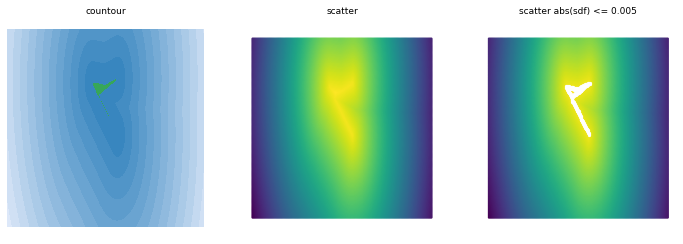

In [13]:
plotit(sample.sdf(sample.left.left))

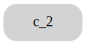

In [14]:
sample.right

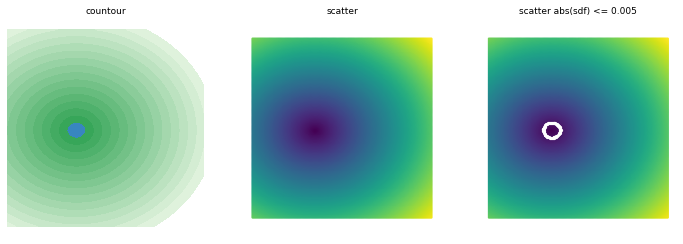

In [15]:
plotit(sample.sdf(sample.right))

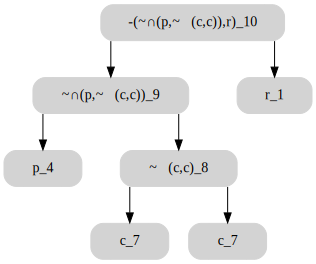

In [16]:
sample.left

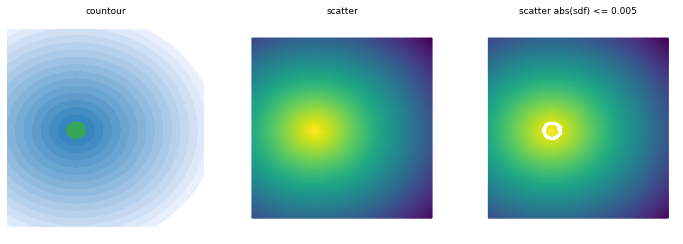

In [17]:
# if node not exists (is None ) the sample.sdf will return root sdf
plotit(sample(sample.right.right))

### How to use the SDF to extract its values for coordinates?

By default every generated shape tries to be in range (-1, 1) but it doesn't mean we can't explore the whole sdf space

In [18]:
# create a list of coordinates than belongs to a 20x20 grid in range -5 to 5
grid = sample_2D_grid(resolution=20, low=-5, high=5)

In [19]:
# get the sdf values for these coordinates
sdf_values = sample().f(grid)
sdf_values = sdf_values.flatten()

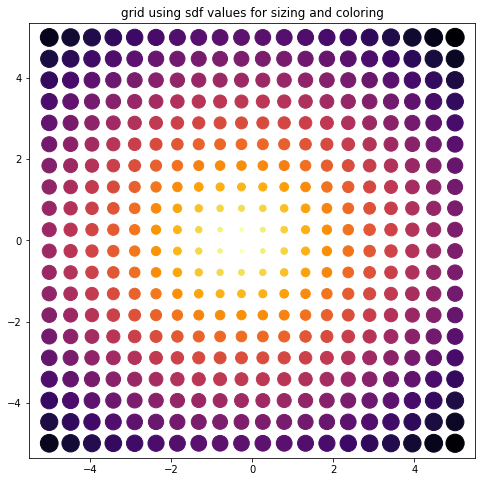

In [20]:
fig = plt.figure(figsize=(8,8))
size = np.abs(sdf_values*50)

plt.scatter(grid[:,0], grid[:,1], s=size, c=sdf_values, cmap='inferno')

# fix axis
plt.axis('equal')
plt.title('grid using sdf values for sizing and coloring')
plt.show()

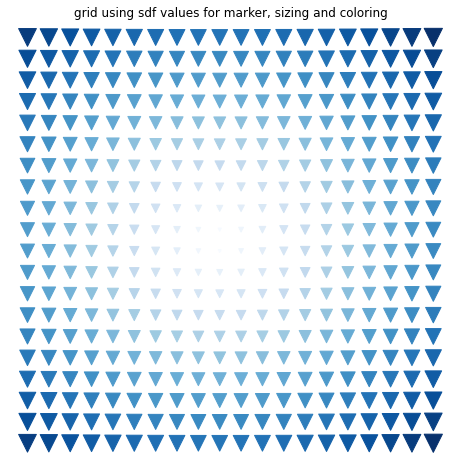

In [21]:
# similar but chainging shape base of sdf value sign

fig = plt.figure(figsize=(8,8))

pos = (sdf_values >= 0)
neg = (sdf_values < 0)

size = np.abs(sdf_values*50)
for marker, cond, cmap in zip(['^','v'], [pos, neg], ['Reds', 'Blues_r']):
    plt.scatter(grid[cond,0], grid[cond,1], s=size[cond], c=sdf_values[cond], cmap=cmap, marker=marker)

# fix axis
plt.axis('equal')
plt.axis('off')
plt.title('grid using sdf values for marker, sizing and coloring')
plt.show()

We can increase the resolution looking closer into range -1 to 1

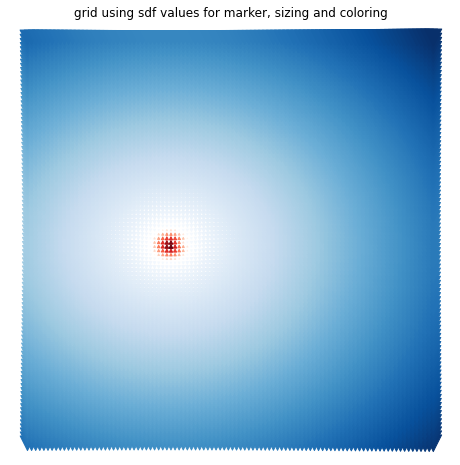

In [22]:
grid = sample_2D_grid(resolution=100, low=-1, high=1)
sdf_values = sample().f(grid)
sdf_values = sdf_values.flatten()

fig = plt.figure(figsize=(8,8))

pos = (sdf_values >= 0)
neg = (sdf_values < 0)

size = np.abs(sdf_values*200)
for marker, cond, cmap in zip(['^','v'], [pos, neg], ['Reds', 'Blues_r']):
    plt.scatter(grid[cond,0], grid[cond,1], s=size[cond], c=sdf_values[cond], cmap=cmap, marker=marker)

# fix axis
plt.axis('equal')
plt.axis('off')
plt.title('grid using sdf values for marker, sizing and coloring')
plt.show()

Let's use the sampler like a sampler

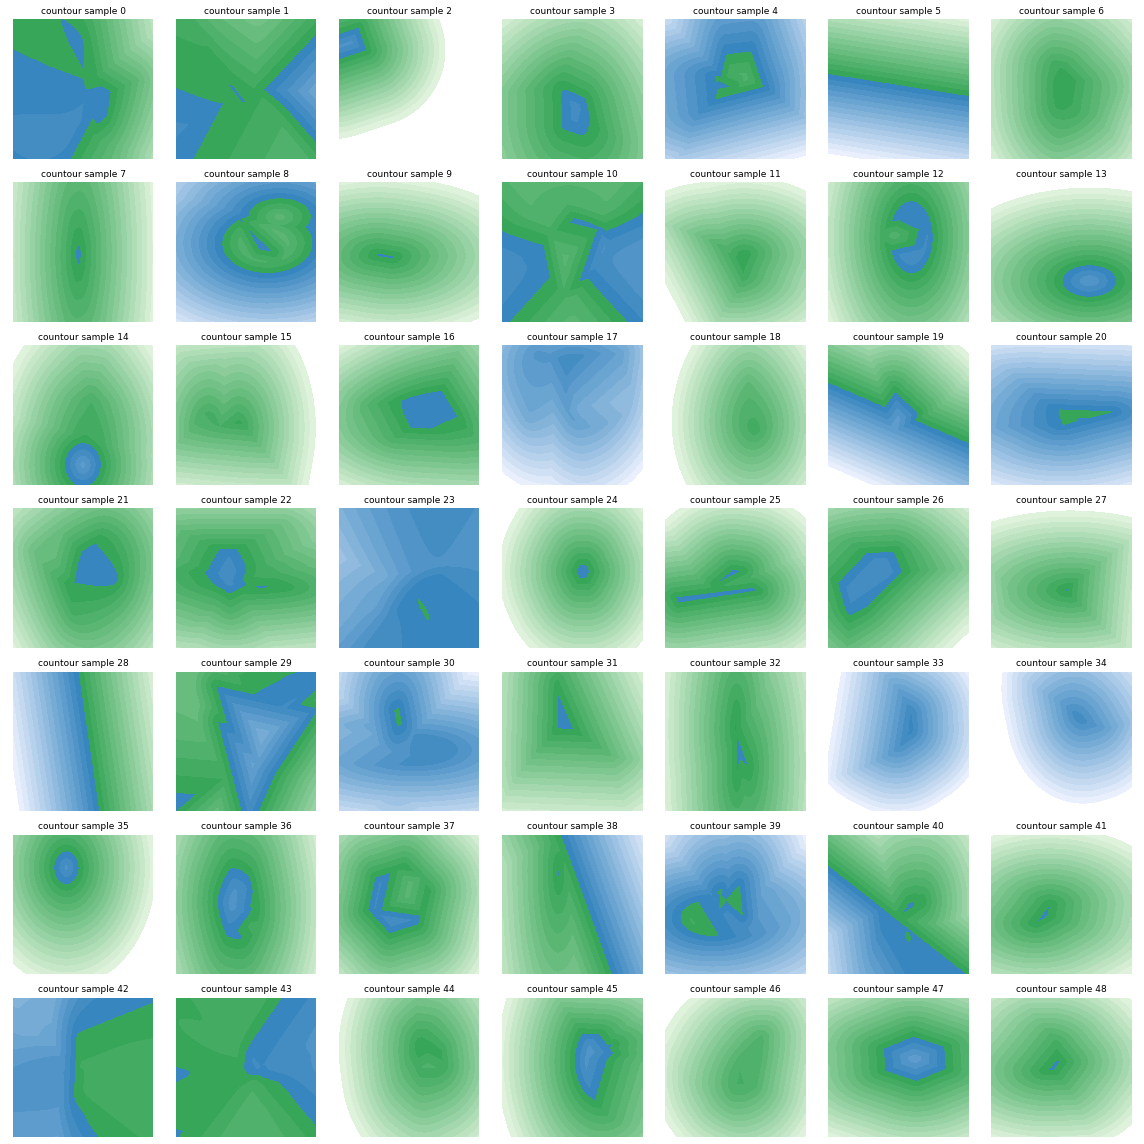

In [23]:
fig, axes = plt.subplots(7,7,figsize=(16,16))
axes = axes.flatten().tolist()
for i, ax in enumerate(axes):
    sample = sampler()
    plot_sdf(sample.sdf(), ax=ax, title=f'countour sample {i}')
plt.tight_layout()
plt.show()

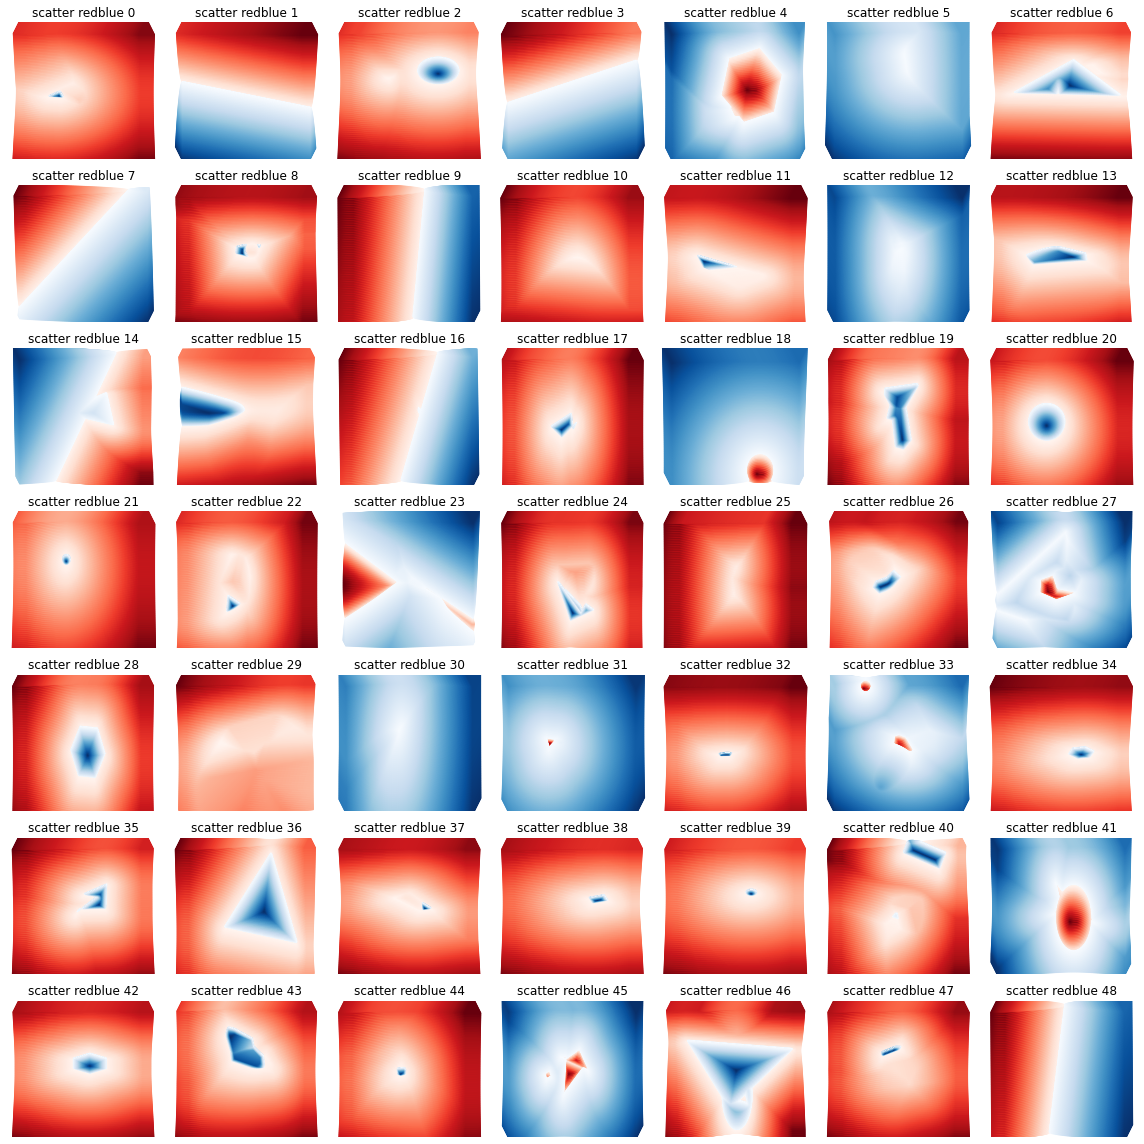

In [24]:
fig, axes = plt.subplots(7,7,figsize=(16,16))
axes = axes.flatten().tolist()
for i, ax in enumerate(axes):
    sample = sampler()
    plot_scatter_redblue(sample.sdf(), ax=ax, title=f'scatter redblue {i}')
plt.tight_layout()
plt.show()

Last sample composition

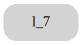

In [25]:
sample.root